# Road Accident Prediction

## Dataset- https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import joblib

In [26]:
data = pd.read_csv("dataset/roadAccident.csv")

In [27]:
data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [28]:
print("\nNull check:")
print(data.isnull().sum())


Null check:
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64


In [29]:
print("\nData types check:")
print(data.dtypes)


Data types check:
Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object


In [30]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

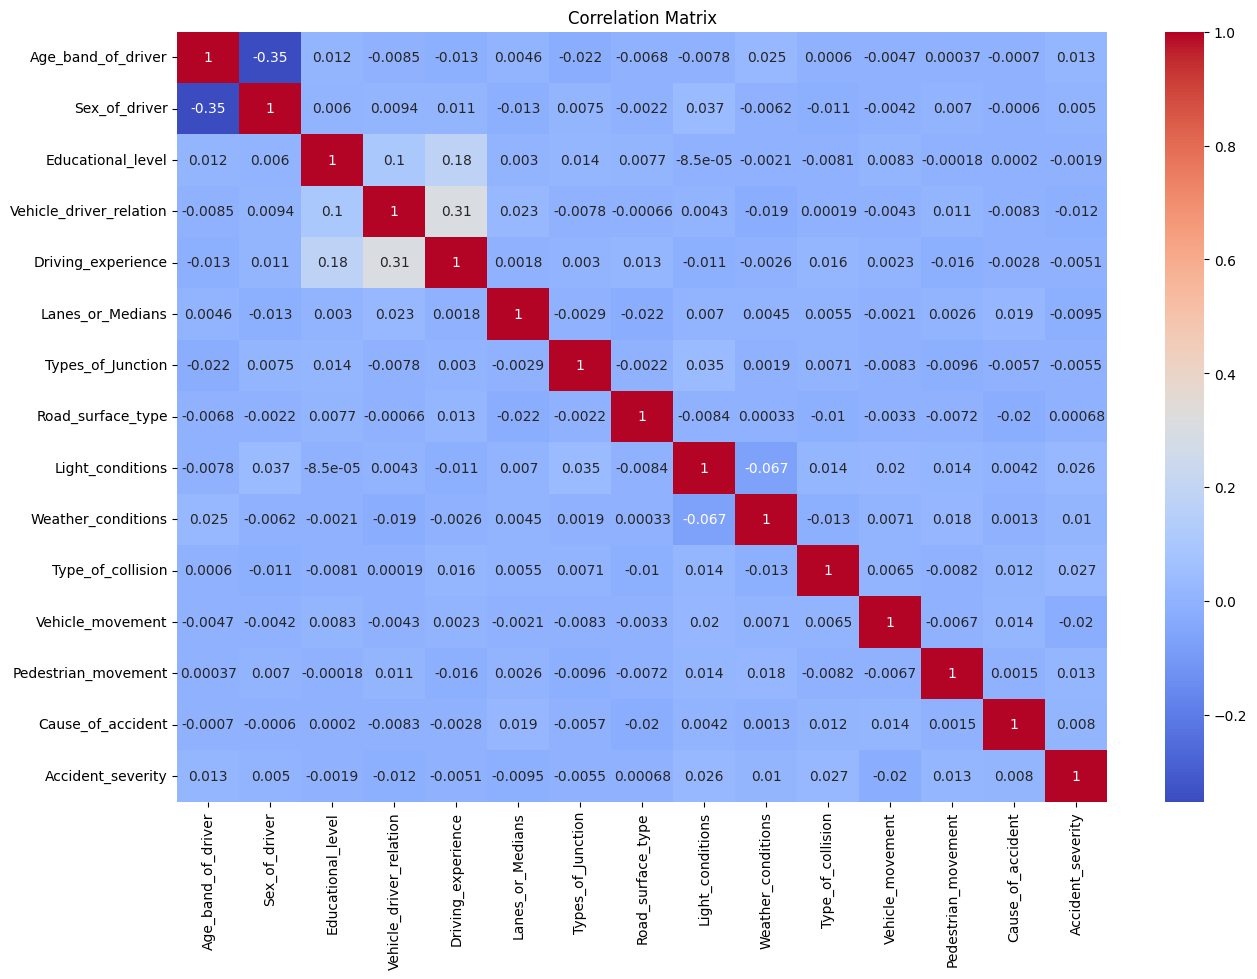

In [31]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Split data into features and target
X = data.drop(columns=['Accident_severity'])
y = data['Accident_severity']

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [35]:
# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

# Display evaluation metrics for each classifier
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"F1 Score: {f1_lr}")
print(f"Recall: {recall_lr}")
print(f"Precision: {precision_lr}")

Logistic Regression:
Accuracy: 0.8376623376623377
F1 Score: 0.7636638979395164
Recall: 0.8376623376623377
Precision: 0.7016781919379322


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [37]:
# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"F1 Score: {f1_dt}")
print(f"Recall: {recall_dt}")
print(f"Precision: {precision_dt}")

Decision Tree:
Accuracy: 0.833198051948052
F1 Score: 0.7621936431729365
Recall: 0.833198051948052
Precision: 0.7126311188811189


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [39]:
# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")

Random Forest:
Accuracy: 0.825487012987013
F1 Score: 0.7582975620994149
Recall: 0.825487012987013
Precision: 0.7051440746753246


In [40]:
# Support Vector Machine
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [41]:
# Evaluate Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

print("Support Vector Machine:")
print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")

Support Vector Machine:
Accuracy: 0.8376623376623377
F1 Score: 0.7636638979395164
Recall: 0.8376623376623377
Precision: 0.7016781919379322


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Save models
joblib.dump(rf_classifier, 'models/model.pkl')

# Save all label encoders into a single file
joblib.dump(label_encoders, 'models/label_encoders.pkl')

['models/label_encoders.pkl']

In [44]:
# Load models
model = joblib.load('models/model.pkl')

# Load the saved label encoders
label_encoders = joblib.load('models/label_encoders.pkl')

severity_mapping = {0: 'Accidents with minor injuries, minimal property damage, or no injuries and minor damage to vehicles or property', 1: 'Accidents with moderate injuries, significant damage to vehicles or property, or requiring medical attention but not life-threatening', 2: 'Accidents with severe injuries, fatalities, extensive damage to vehicles or property, or involving hazardous materials or major road closures'}

# Take user input for random values
sample_data = {
    "Age_band_of_driver": "18-30",
    "Sex_of_driver": "Female",
    "Educational_level": "Above high school",
    "Vehicle_driver_relation": "Employee",
    "Driving_experience": "1-2yr",
    "Lanes_or_Medians": "Unknown",
    "Types_of_Junction": "No junction",
    "Road_surface_type": "Asphalt roads",
    "Light_conditions": "Daylight",
    "Weather_conditions": "Normal",
    "Type_of_collision": "Collision with roadside-parked vehicles",
    "Vehicle_movement": "Going straight",
    "Pedestrian_movement": "Not a Pedestrian",
    "Cause_of_accident": "Moving Backward"
}

# sample_data = {
#     "Age_band_of_driver": "31-50",
#     "Sex_of_driver": "Male",
#     "Educational_level": "Above high school",
#     "Vehicle_driver_relation": "Employee",
#     "Driving_experience": "No Licence",
#     "Lanes_or_Medians": "Undivided Two way",
#     "Types_of_Junction": "No junction",
#     "Road_surface_type": "Earth roads",
#     "Light_conditions": "Daylight",
#     "Weather_conditions": "Normal",
#     "Type_of_collision": "Collision with animals",
#     "Vehicle_movement": "Going straight",
#     "Pedestrian_movement": "Not a Pedestrian",
#     "Cause_of_accident": "No priority to pedestrian"
# }

# Transform user input and perform prediction
sample_data_df = pd.DataFrame([sample_data])
for column, encoder in label_encoders.items():
    sample_data_df[column] = encoder.transform(sample_data_df[column])
prediction = model.predict(sample_data_df)

# Display prediction
print(severity_mapping[prediction[0]])

Accidents with severe injuries, fatalities, extensive damage to vehicles or property, or involving hazardous materials or major road closures
